# Analyze processed ACS and BB3 data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import glob

In [1]:
data_src='data/'

In [2]:
acs_device_file = open(data_src+'acs_wavelengths.txt', "r").read()
acs_lambda = []
for line in acs_device_file.splitlines():
    acs_lambda.append(float(line[8:13]))
acs_wavelength = np.array(acs_lambda)

In [6]:
acs_wavelength[15]

462.4

In [5]:
! ls data/optical_inline

cdom_interp_210905-7_ACS_qc24.csv
cdom_interp_210905-7_ACS_qc24_filt.csv
cdom_interp_210905-7_BB3_qc24.csv
cdom_interp_210905-7_CDOM_qc24.csv
cdom_interp_210905-7_TSG_qc24.csv
linear_interp_210905-7_ACS_qc24.csv
linear_interp_210905-7_ACS_qc24_filt.csv
linear_interp_210905-7_BB3_qc24.csv
linear_interp_210905-7_CDOM_qc24.csv
linear_interp_210905-7_TSG_qc24.csv


In [6]:
df_whole = pd.read_csv(data_src+'optical_inline/linear_interp_210905-7_ACS_qc24.csv')
# df_whole = pd.read_csv('data/cdom_interp_210906_acs_strict7.csv')
# df_whole = pd.read_csv('data/cdom_interp_210906_ACS_strict20.csv')
df_whole['dt'] = pd.to_datetime(df_whole['dt'])
df_whole['datetime']  = pd.to_datetime(df_whole['dt'])
df_whole= df_whole.set_index('dt')

In [7]:
df_filt = pd.read_csv(data_src+'optical_inline/linear_interp_210905-7_ACS_qc24_filt.csv')


df_filt['dt'] = pd.to_datetime(df_filt['dt'])
df_filt['datetime']  = pd.to_datetime(df_filt['dt'])
df_filt= df_filt.set_index('dt')

In [8]:
df_cdom = pd.read_csv(data_src+'optical_inline/linear_interp_210905-7_CDOM_qc24.csv')
df_cdom['dt'] = pd.to_datetime(df_cdom['dt'])
df_cdom['datetime']  = pd.to_datetime(df_cdom['dt'])
df_cdom= df_cdom.set_index('dt')

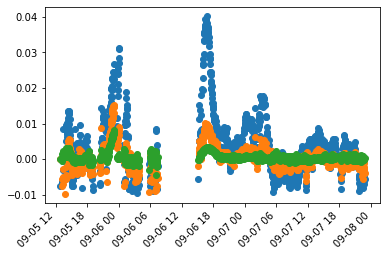

In [9]:
fig, ax = plt.subplots()
ax.scatter(df_whole['datetime'], df_whole['ap_30'])
ax.scatter(df_whole['datetime'], df_whole['ap_50'])
ax.scatter(df_whole['datetime'], df_whole['ap_70'])

# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
fig.autofmt_xdate(rotation=45)

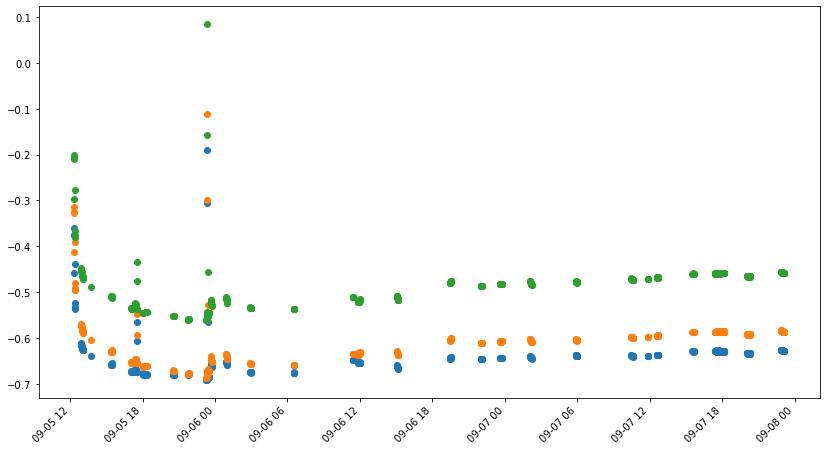

In [53]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(df_filt['datetime'], df_filt['a_30'])
ax.scatter(df_filt['datetime'], df_filt['a_50'])
ax.scatter(df_filt['datetime'], df_filt['a_70'])

# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
fig.autofmt_xdate(rotation=45)

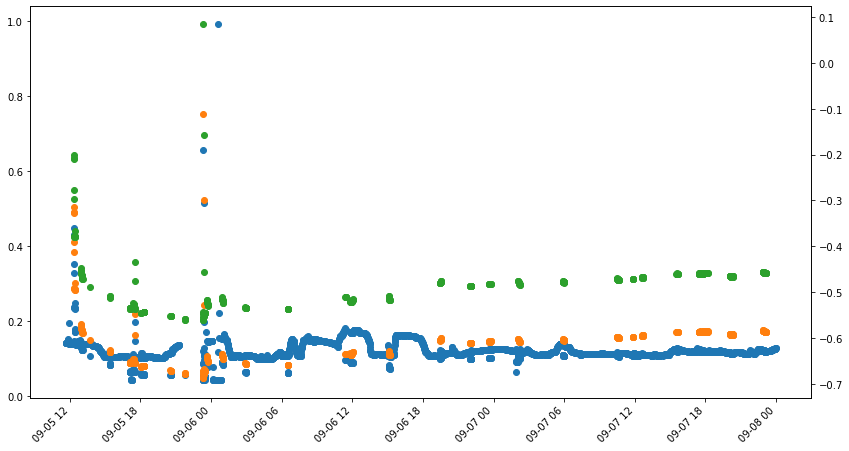

In [54]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(df_cdom['datetime'], df_cdom['fdom'])
# ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax2 = ax.twinx()
ax2.scatter(df_filt['datetime'], df_filt['a_30'])
ax2.scatter(df_filt['datetime'], df_filt['a_50'])
ax2.scatter(df_filt['datetime'], df_filt['a_70'])

fig.autofmt_xdate(rotation=45)

In [55]:
len(df_whole)

1592

In [10]:
df_subset = df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00']
df_filt_subset = df_filt.loc['2021/09/06 15:00:00':'2021/09/06 20:30:00']

df_cdom_subset = df_cdom.loc['2021/09/06 15:00:00':'2021/09/06 20:30:00']

# df_subset = df_whole.loc['2021/09/07 13:00:00':'2021/09/07 15:30:00']

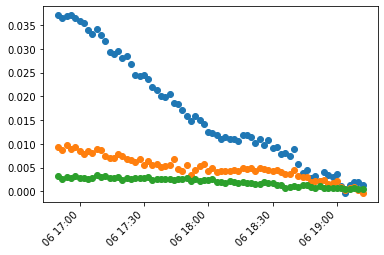

In [11]:
fig, ax = plt.subplots()
ax.scatter(df_subset['datetime'], df_subset['ap_30'])
ax.scatter(df_subset['datetime'], df_subset['ap_50'])
ax.scatter(df_subset['datetime'], df_subset['ap_70'])

# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
fig.autofmt_xdate(rotation=45)

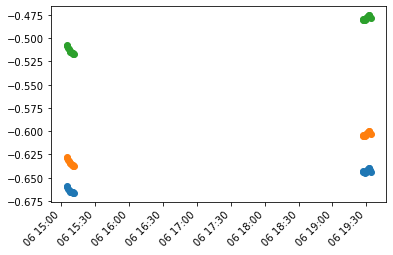

In [58]:
fig, ax = plt.subplots()
ax.scatter(df_filt_subset['datetime'], df_filt_subset['a_30'])
ax.scatter(df_filt_subset['datetime'], df_filt_subset['a_50'])
ax.scatter(df_filt_subset['datetime'], df_filt_subset['a_70'])

# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
fig.autofmt_xdate(rotation=45)

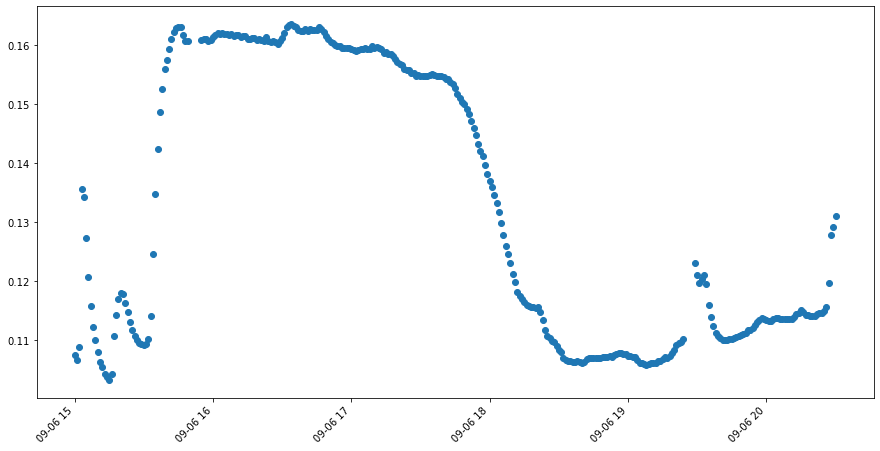

In [59]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df_cdom_subset['datetime'], df_cdom_subset['fdom'])
# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
fig.autofmt_xdate(rotation=45)

In [60]:
chla_df = pd.read_csv('data/acs_attempts/chla_data_processed.csv')

In [61]:
chla_df.head(2)

,Sample#,Time (UTC),Date,Volume Filtered (L),DNA,FCM,Chlorophyll,Nutrients,Sample#.1,A,B,Chla A,Chla B
0,1,12:07,9/5/2021,4,1,2,2,2,1,4.72,4.53,0.2342,0.2247
1,2,13:02,9/5/2021,4,1,2,2,2,2,4.22,4.50,0.2092,0.2232


In [62]:
chla_df['datetime'] = pd.to_datetime(chla_df['Date'] + ' ' + chla_df['Time (UTC)'])

In [63]:
chla_df['dt'] = chla_df['datetime']
chla_df= chla_df.set_index('dt')
chla_df_subset = chla_df.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00']
# chla_df_subset = chla_df.loc['2021/09/07 13:00:00':'2021/09/07 15:30:00']

<ipython-input-63-69d759b092eb>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  chla_df_subset = chla_df.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00']


In [64]:
plt.rcParams.update({'font.size': 16})

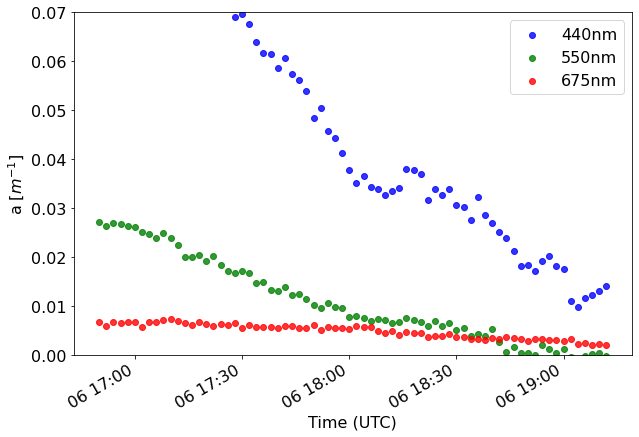

In [65]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,10], label='440nm', color='blue', alpha=0.8)
ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,35], label='550nm', color='green', alpha=0.8)
ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,64], label='675nm', color='red', alpha=0.8)
ax.legend()
ax.set_ylim(0,0.07)
ax.set_ylabel('a [$m^{-1}$]')
ax.set_xlabel('Time (UTC)')
fig.autofmt_xdate(rotation=30)
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# fig.savefig('acs_abs.png')

In [23]:
acs_wavelength[37]

559.8

In [66]:
start_times = ['2021-09-5 13:00:00', '2021-09-5 18:15:00', '2021-09-6 1:15:00', '2021-09-6 5:10:00', '2021-09-6 12:30:00', '2021-09-6 16:45:00', '2021-09-7 2:55:00', '2021-09-7 6:45:00', '2021-09-7 12:10:00']
end_times = ['2021-09-5 17:30:00','2021-09-5 20:30:00', '2021-09-6 3:45:00', '2021-09-6 6:45:00', '2021-09-6 15:00:00', '2021-09-6 19:20:00', '2021-09-7 5:35:00', '2021-09-7 9:00:00', '2021-09-7 15:30:00']

These are the times that seem to be reasonable, right now including the suspect transect 7

In [119]:
start_times = ['2021-09-5 14:20:00', '2021-09-5 18:15:00', '2021-09-6 1:00:00', '2021-09-6 5:10:00', '2021-09-6 16:45:00', '2021-09-7 2:55:00', '2021-09-7 6:45:00', '2021-09-7 12:45:00']
end_times = ['2021-09-5 17:00:00','2021-09-5 20:30:00', '2021-09-6 4:00:00', '2021-09-6 6:45:00', '2021-09-6 19:20:00', '2021-09-7 5:35:00', '2021-09-7 9:00:00', '2021-09-7 15:30:00']

------
2021-09-05 14:20:00 -> 2021-09-05 17:00:00
78


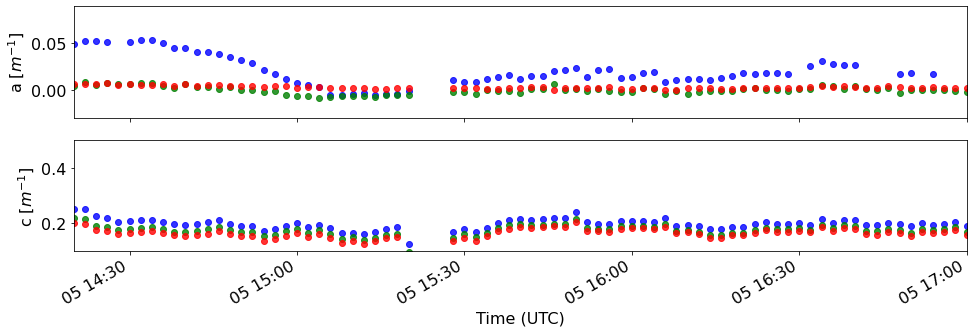

------
2021-09-05 18:20:00 -> 2021-09-05 20:30:00
66


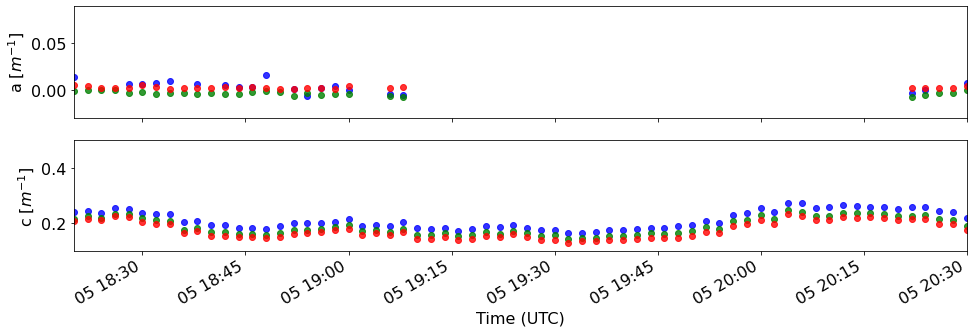

------
2021-09-06 01:02:00 -> 2021-09-06 04:00:00
87


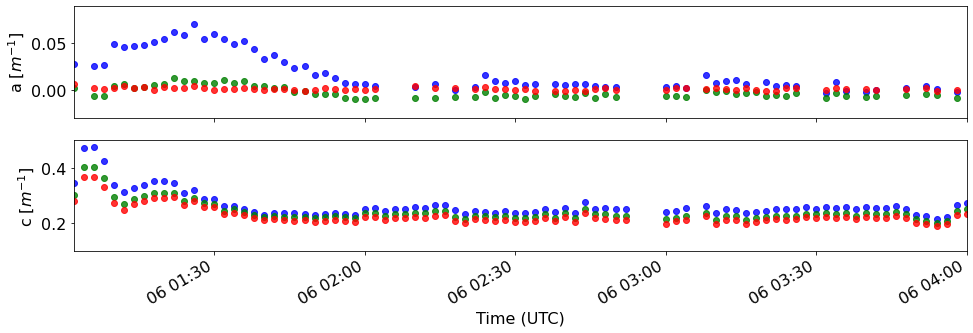

------
2021-09-06 05:10:00 -> 2021-09-06 06:44:00
46


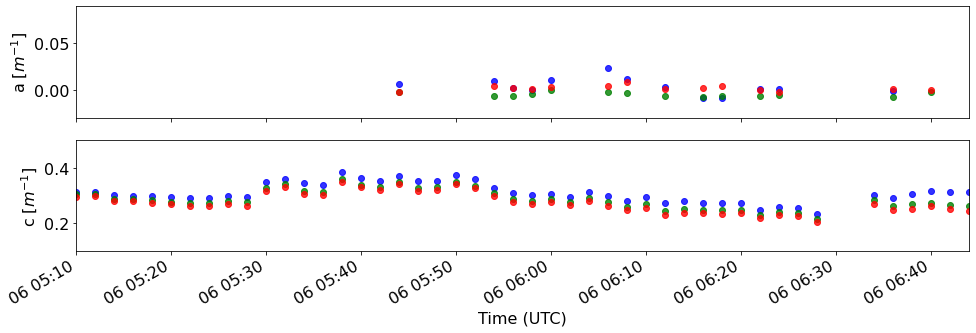

------
2021-09-06 16:46:00 -> 2021-09-06 19:20:00
78


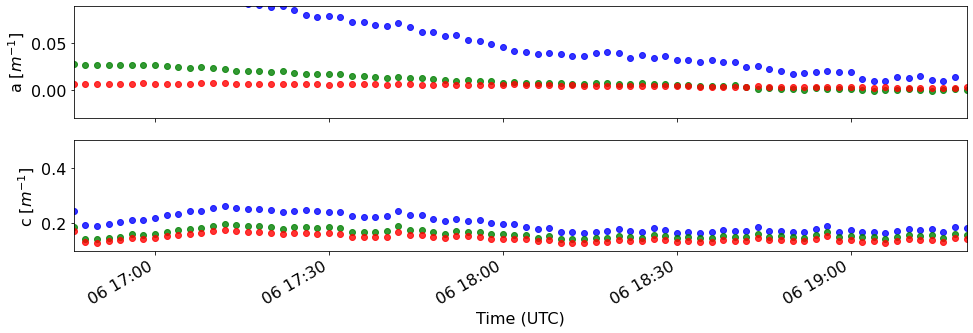

------
2021-09-07 02:56:00 -> 2021-09-07 05:34:00
80


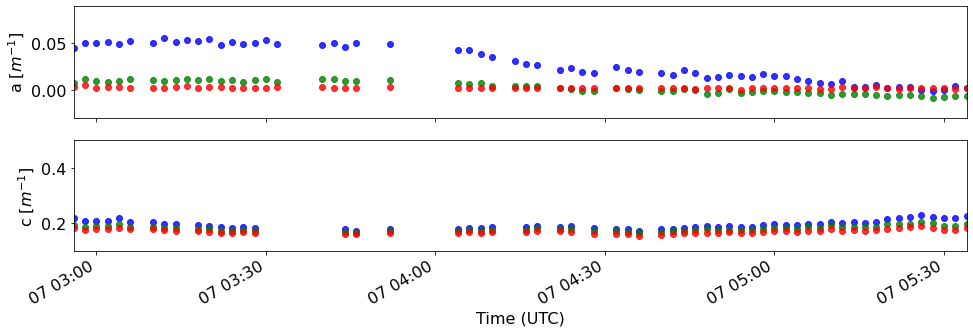

------
2021-09-07 06:46:00 -> 2021-09-07 09:00:00
68


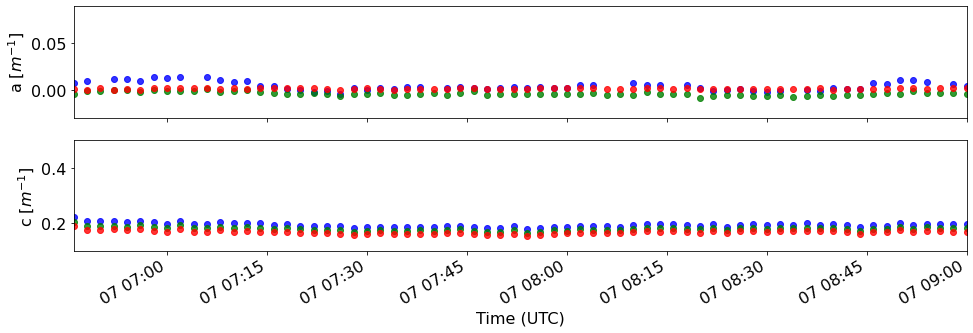

------
2021-09-07 12:46:00 -> 2021-09-07 15:30:00
83


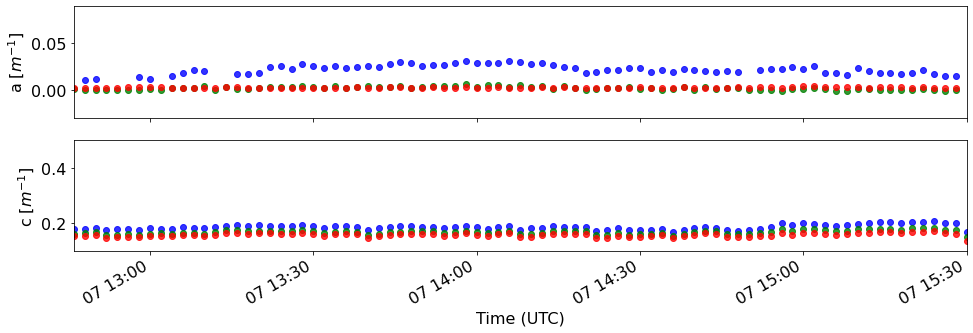

In [120]:
for i in range(len(start_times)):
    df_subset = df_whole.loc[start_times[i]:end_times[i]]
    print('------')
    print(str(df_subset.iloc[0].datetime) + ' -> ' + str(df_subset.iloc[-1].datetime))
    print(len(df_subset))
    
    fig, ax = plt.subplots(2,1,figsize=(16,5))
    for idx, i in enumerate([0,81]):
        ax[idx].scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,8+i], label='440nm', color='blue', alpha=0.8)
        ax[idx].scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,35+i], label='550nm', color='green', alpha=0.8)
        ax[idx].scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,64+i], label='675nm', color='red', alpha=0.8)
#         ax[idx].legend()
    #     ax.set_ylim(-0.03,0.09)
        
        ax[idx].set_xlabel('Time (UTC)')
        ax[idx].set_xlim(df_subset.datetime.min(), df_subset.datetime.max())
        fig.autofmt_xdate(rotation=30)
    ax[0].set_ylim(-0.03,0.09)
    ax[1].set_ylim(.1,.5)
    ax[0].set_ylabel('a [$m^{-1}$]')
    ax[1].set_ylabel('c [$m^{-1}$]')
    # ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    # fig.savefig('acs_abs.png')
    plt.show()

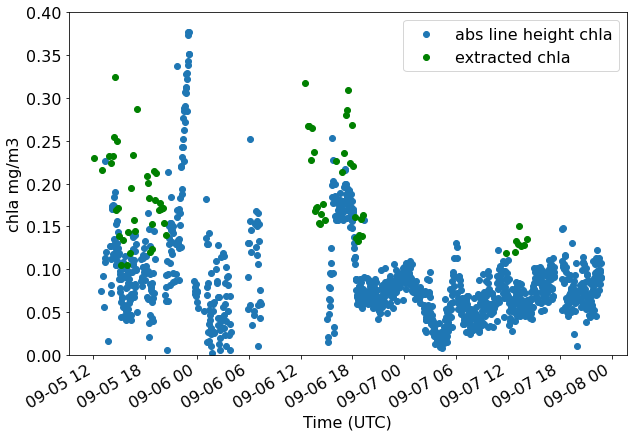

In [78]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(pd.to_datetime(df_whole.datetime),df_whole['chl_ap676lh'], label='abs line height chla')
ax.scatter(chla_df.datetime,(chla_df['Chla A'].values+chla_df['Chla B'].values)/2, color='green', label='extracted chla')
# plt.scatter(chla_df_subset.datetime,chla_df_subset['Chla B'], color='green')
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('chla mg/m3')
ax.set_ylim(0,.40)
ax.legend()
fig.autofmt_xdate(rotation=30)


# plt.savefig('chl_ap676lh.png')

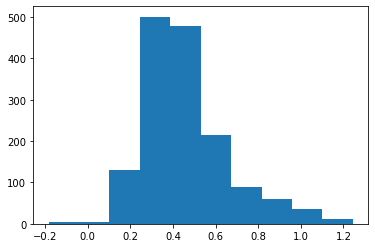

In [14]:
plt.hist(df_whole['gamma'])
plt.show()

Text(0.5, 0, 'Time (UTC)')

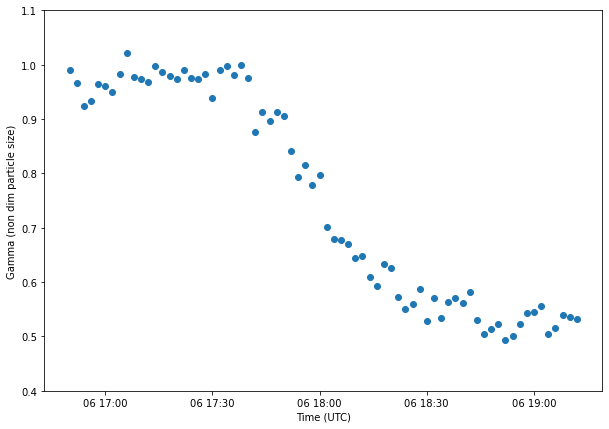

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(pd.to_datetime(df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].datetime),df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00']['gamma'])
ax.set_ylim(.4,1.1)
ax.set_ylabel('Gamma (non dim particle size)')
ax.set_xlabel('Time (UTC)')

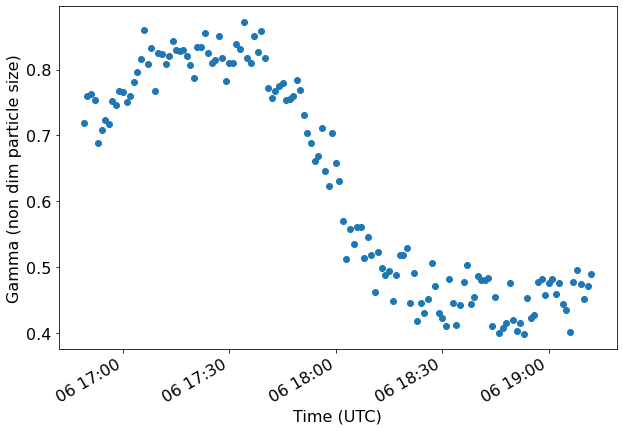

In [44]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(pd.to_datetime(df_subset.datetime),df_subset['gamma'])
# ax.set_ylim(0,.9)
ax.set_ylabel('Gamma (non dim particle size)')
ax.set_xlabel('Time (UTC)')
fig.autofmt_xdate(rotation=30)
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# fig.savefig('gamma_psd.png')

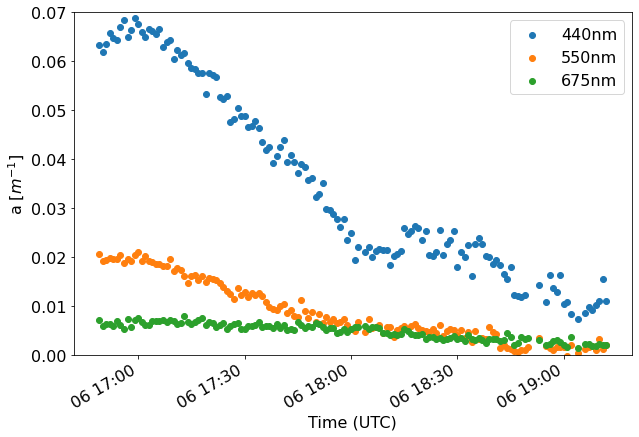

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,10], label='440nm')
ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,35], label='550nm')
ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,64], label='675nm')
ax.legend()
ax.set_ylim(0,0.07)
ax.set_ylabel('a [$m^{-1}$]')
ax.set_xlabel('Time (UTC)')
fig.autofmt_xdate(rotation=30)
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# fig.savefig('acs_abs.png')

In [224]:
df_subset = df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00']
len(df_subset.columns)

349

In [210]:
df_datetimes = df_subset['datetime']
df_subset = df_subset.resample('180S').mean()
df_subset['datetime'] = df_datetimes

In [211]:
df_subset.columns[30]

'ap_31'

In [212]:
acs_wavelength[24]

502.8

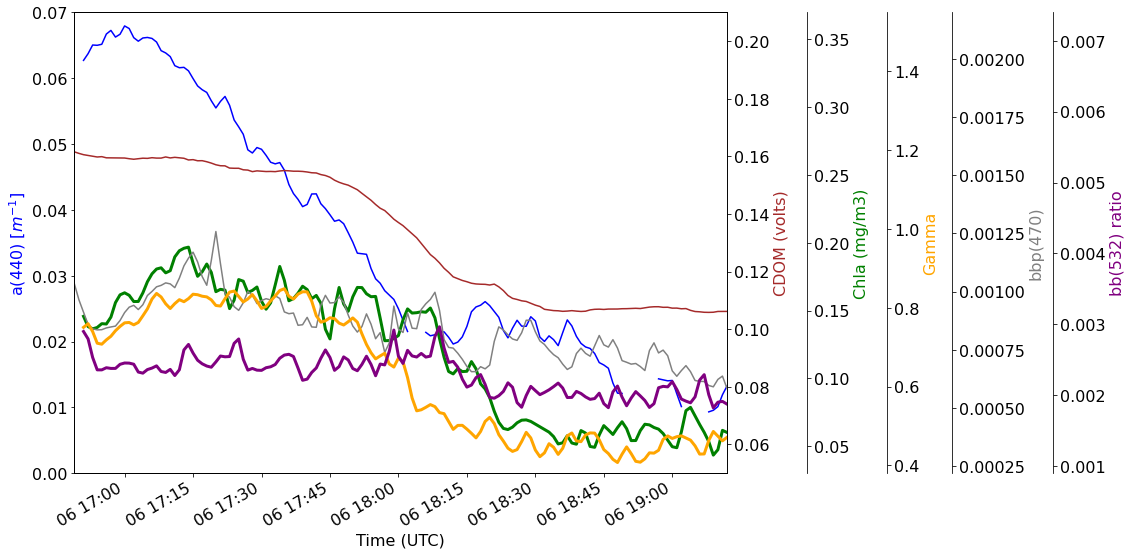

In [242]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,10].rolling(window=3, win_type='triang').mean(), label='440nm', color='blue')
# ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,24], label='500nm', color='teal')
# ax.scatter(pd.to_datetime(df_subset.datetime),df_subset.iloc[:,64], label='675nm', color='red')

ax2 = ax.twinx()
ax2.plot(pd.to_datetime(df_subset.datetime),df_subset['chl_ap676lh'].interpolate(method='linear').rolling(window=3, win_type='triang').mean(), color='green', lw=3)
# ax2.set_ylim(0,2)

ax2.spines['right'].set_position(('outward', 80))
ax2.set_ylabel("Chla (mg/m3)")
ax2.yaxis.label.set_color('green')

ax3 = ax.twinx()
ax3.plot(pd.to_datetime(df_cdom_subset['datetime']), df_cdom_subset['fdom'], color='brown')
ax3.set_ylabel("CDOM (volts)")
ax3.yaxis.label.set_color('brown')

ax5 = ax.twinx()
ax5.plot(pd.to_datetime(bb3_subset.datetime),bb3_subset.bbp_1.rolling(window=3, win_type='triang').mean(), color='grey')

ax5.spines['right'].set_position(('outward', 225))
ax5.set_ylabel("bbp(470)")
ax5.yaxis.label.set_color('grey')

ax4 = ax.twinx()
ax4.plot(pd.to_datetime(df_subset.datetime),df_subset['gamma'].rolling(window=3, win_type='triang').mean(),color='orange', lw=3)

ax4.spines['right'].set_position(('outward', 160))
ax4.set_ylabel("Gamma")
ax4.yaxis.label.set_color('orange')

ax6 = ax.twinx()
ax6.plot(df_subset.datetime,df_subset.bb_ratio.rolling(window=3, win_type='triang').mean(), color='purple', lw=3)

ax6.spines['right'].set_position(('outward', 326))
ax6.set_ylabel("bb(532) ratio")
ax6.yaxis.label.set_color('purple')




ax.set_ylim(0,0.07)
ax2.set_ylim(.03,.37)
ax3.set_ylim(.05,.21)
ax4.set_ylim(0.38,1.55)
ax5.set_ylim(0.00022,0.0022)
ax6.set_ylim(0.0009,0.0074)


ax.set_xlim(df_subset.datetime.min(), df_subset.datetime.max())


# ax.legend(loc='upper right')
ax.set_ylabel('a(440) [$m^{-1}$]')
ax.yaxis.label.set_color('blue')
ax.set_xlabel('Time (UTC)')
fig.autofmt_xdate(rotation=30)
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
fig.tight_layout()
fig.savefig('figs/sept_optical_fig_abs.png')

In [30]:
from colour import Color

In [42]:
df_subset.iloc[i,81*1:81*2]

cp_1          NaN
cp_2     0.165455
cp_3     0.173529
cp_4     0.176559
cp_5     0.160230
           ...   
cp_77         NaN
cp_78         NaN
cp_79         NaN
cp_80         NaN
cp_81         NaN
Name: 2021-09-07 15:30:00, Length: 81, dtype: object

------
2021-09-05 13:06:00 -> 2021-09-05 17:22:00
122


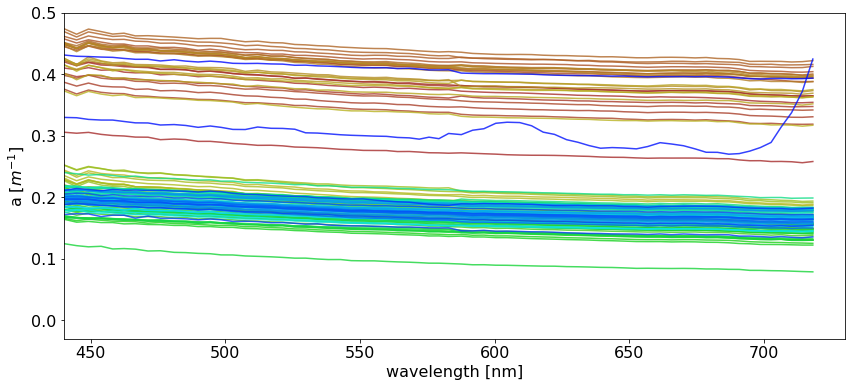

------
2021-09-05 18:20:00 -> 2021-09-05 20:30:00
66


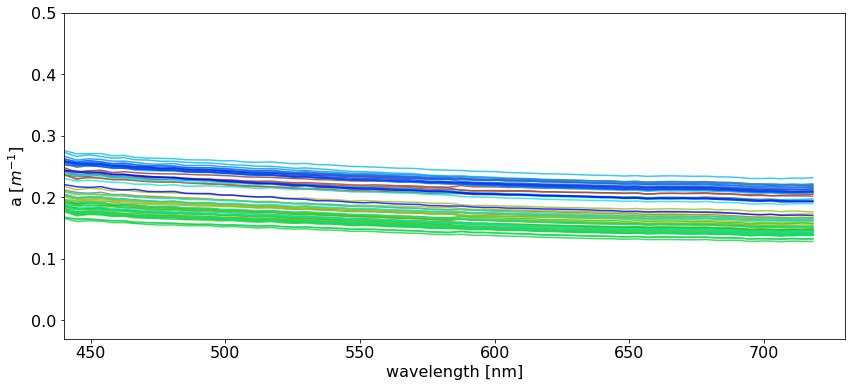

------
2021-09-06 01:02:00 -> 2021-09-06 04:00:00
87


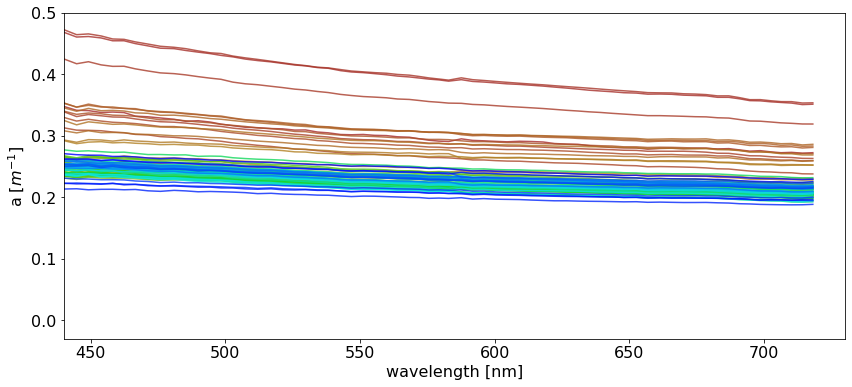

------
2021-09-06 05:10:00 -> 2021-09-06 06:44:00
46


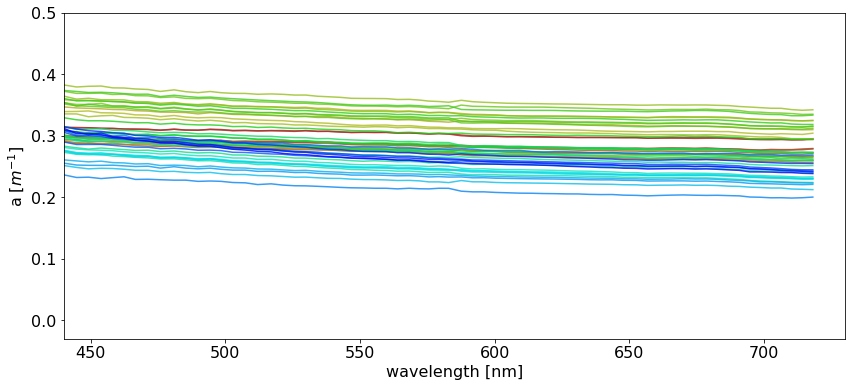

------
2021-09-06 12:30:00 -> 2021-09-06 15:00:00
76


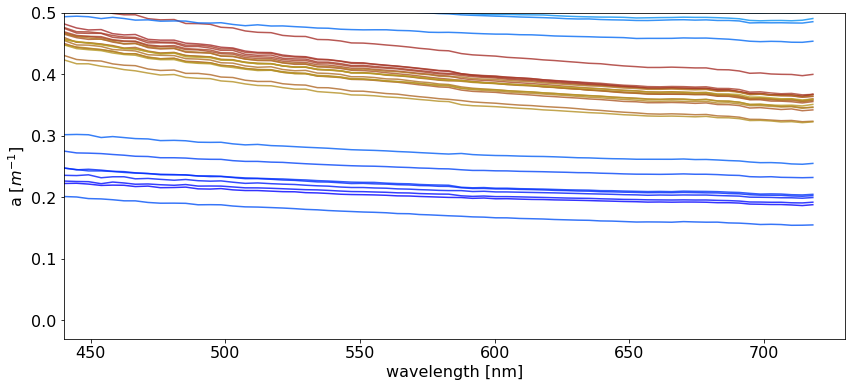

------
2021-09-06 16:46:00 -> 2021-09-06 19:20:00
78


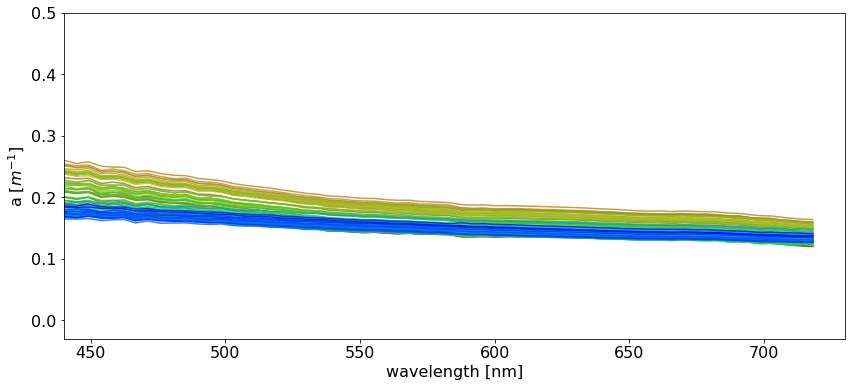

------
2021-09-07 02:56:00 -> 2021-09-07 05:34:00
80


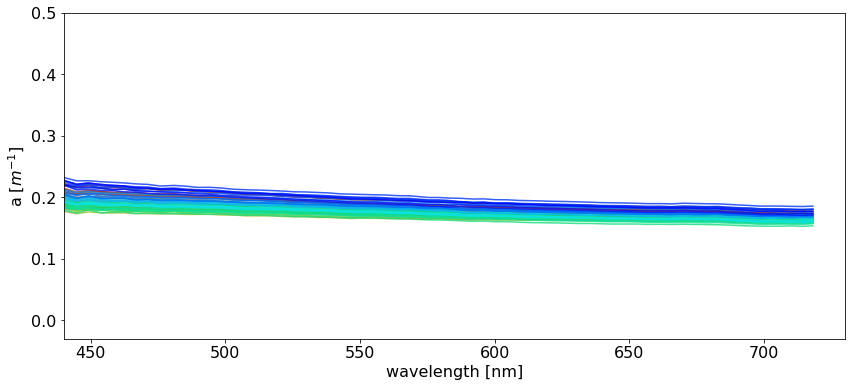

------
2021-09-07 06:46:00 -> 2021-09-07 09:00:00
68


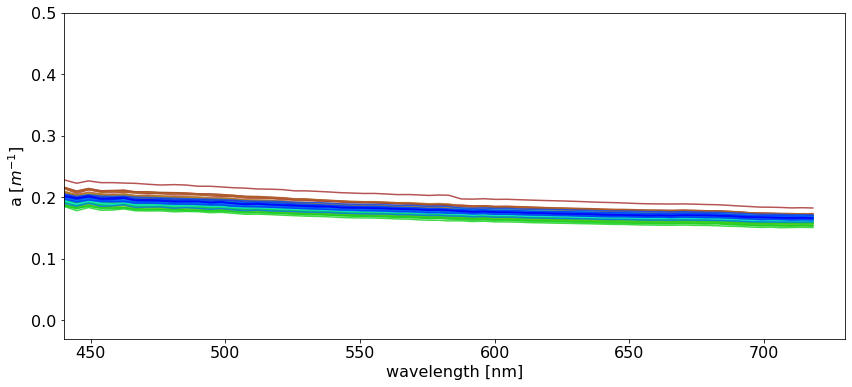

------
2021-09-07 12:10:00 -> 2021-09-07 15:30:00
97


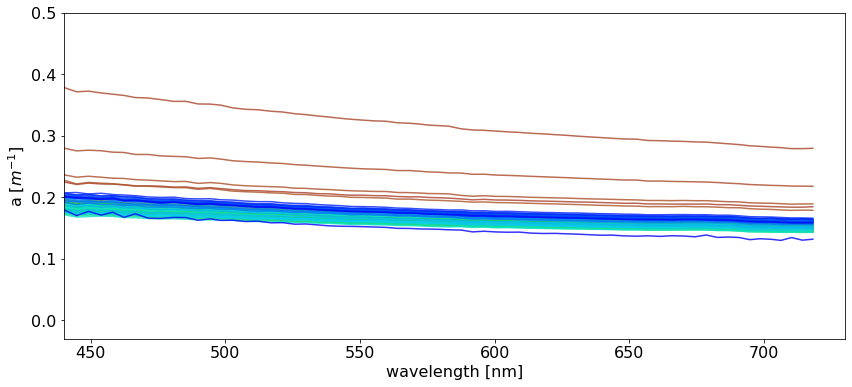

In [86]:
for i in range(len(start_times)):
    df_subset = df_whole.loc[start_times[i]:end_times[i]]
    print('------')
    print(str(df_subset.iloc[0].datetime) + ' -> ' + str(df_subset.iloc[-1].datetime))
    print(len(df_subset))
    
    colors = list(Color("brown").range_to(Color("blue"),len(df_subset)))
    hex_colors = [j.hex for j in colors]
    
    fig, ax = plt.subplots(figsize=(14,6))
    for i in range(len(df_subset)):
        if ~df_subset.iloc[i,81*1:81*2].isnull().values.all():
            ax.plot(acs_wavelength,df_subset.iloc[i,81*1:81*2].rolling(window=1, win_type='triang').mean(), c=hex_colors[i], alpha=.8)
    ax.set_ylim(-0.03,.5)
    ax.set_xlim(440,730)
    #ax.set_title('Particulate Abs')
    ax.set_ylabel('a [$m^{-1}$]')
    ax.set_xlabel('wavelength [nm]')  
    # plt.title('Absorption colored by time (brown to blue) across a coastal to open ocean transect')
#     plt.savefig('figs/sept6_a_spec.png')
    plt.show()

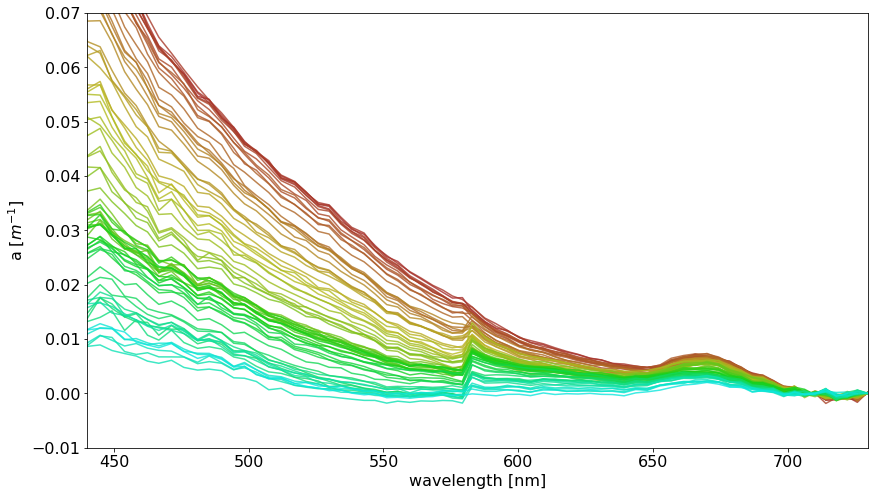

In [88]:
fig, ax = plt.subplots(figsize=(14,8))
for i in range(len(df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'])):
    if ~df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].iloc[i,1:82].isnull().values.all():
        ax.plot(acs_wavelength,df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].iloc[i,1:82].rolling(window=1, win_type='triang').mean(), c=hex_colors[i], alpha=.8)
ax.set_ylim(-0.01,.07)
ax.set_xlim(440,730)
#ax.set_title('Particulate Abs')
ax.set_ylabel('a [$m^{-1}$]')
ax.set_xlabel('wavelength [nm]')  
# plt.title('Absorption colored by time (brown to blue) across a coastal to open ocean transect')
# plt.savefig('figs/sept6_a_spec.png')
plt.show()

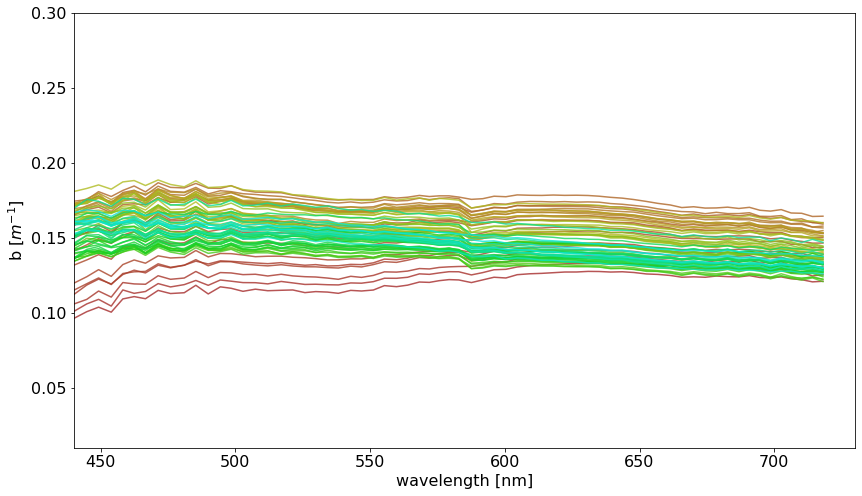

In [89]:
fig, ax = plt.subplots(figsize=(14,8))
for i in range(len(df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'])):
    if ~df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].iloc[i,81*1:81*2].isnull().values.all():
        ax.plot(acs_wavelength,df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].iloc[i,81*1:81*2].values-df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].iloc[i,81*0:81*1].values, c=hex_colors[i], alpha=.8)
ax.set_ylim(0.01,.30)
ax.set_xlim(440,730)
#ax.set_title('Particulate Abs')
ax.set_ylabel('b [$m^{-1}$]')
ax.set_xlabel('wavelength [nm]')  
# plt.title('Scattering colored by time (brown to blue) across a coastal to open ocean transect')
# plt.savefig('figs/sept6_b_spec.png')
plt.show()

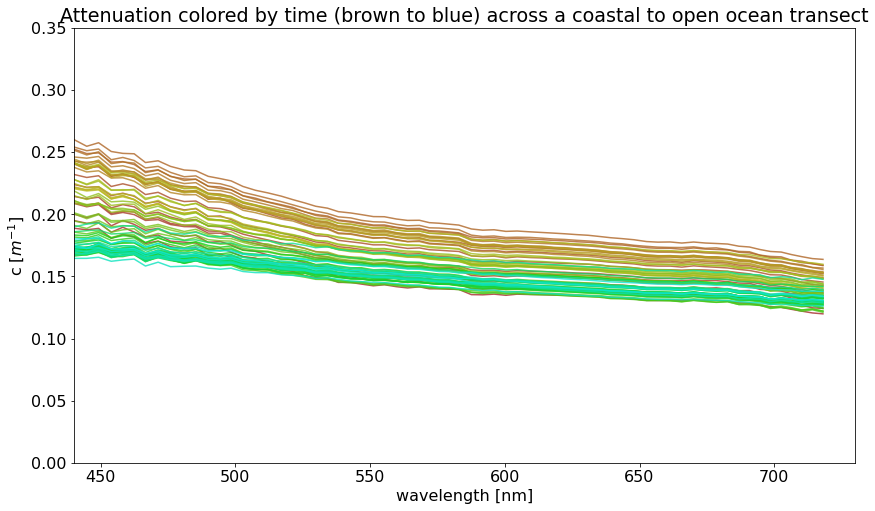

In [90]:
fig, ax = plt.subplots(figsize=(14,8))
for i in range(len(df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'])):
    if ~df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].iloc[i,1:82].isnull().values.all():
        ax.plot(acs_wavelength,df_whole.loc['2021/09/06 16:49:00':'2021/09/06 19:12:00'].iloc[i,81*1:81*2].values, c=hex_colors[i], alpha=.8)
ax.set_ylim(0,.35)
ax.set_xlim(440,730)
#ax.set_title('Particulate Abs')
ax.set_ylabel('c [$m^{-1}$]')
ax.set_xlabel('wavelength [nm]')  
plt.title('Attenuation colored by time (brown to blue) across a coastal to open ocean transect')
# plt.savefig('c_spec.png')
plt.show()

In [93]:
! ls data/optical_inline/

cdom_interp_210905-7_ACS_qc24.csv
cdom_interp_210905-7_ACS_qc24_filt.csv
cdom_interp_210905-7_BB3_qc24.csv
cdom_interp_210905-7_CDOM_qc24.csv
cdom_interp_210905-7_TSG_qc24.csv
linear_interp_210905-7_ACS_qc24.csv
linear_interp_210905-7_ACS_qc24_filt.csv
linear_interp_210905-7_BB3_qc24.csv
linear_interp_210905-7_CDOM_qc24.csv
linear_interp_210905-7_TSG_qc24.csv


In [102]:
# bb3 = pd.read_csv('data/cdom_interp_210907_BB3_strict20.csv')
bb3 = pd.read_csv(data_src+'optical_inline/linear_interp_210905-7_BB3_qc24.csv')

In [103]:
bb3['dt'] = pd.to_datetime(bb3['dt'])
bb3['datetime']  = bb3['dt']
bb3 = bb3.set_index('dt')
bb3_subset = bb3.loc['2021/09/06 16:00:00':'2021/09/06 19:30:00']
# bb3_subset = bb3.loc['2021/09/07 13:00:00':'2021/09/07 15:30:00']

In [104]:
bb3_subset.head()

,betap_1,betap_2,betap_3,bbp_1,bbp_2,bbp_3,betap_sd_1,betap_sd_2,betap_sd_3,betap_n,gamma_bbp,poc_1,poc_2,poc_3,cphyto_1,cphyto_2,cphyto_3,datetime
dt,,,,,,,,,,,,,,,,,,
2021-09-06 16:00:00,0.000123,0.000063,0.000098,0.000829,0.000425,0.000665,0.000055,0.000031,0.000049,53,0.575782,22.384021,13.849880,23.046010,10.643443,6.271377,10.982582,2021-09-06 16:00:00
2021-09-06 16:01:00,0.000131,0.000074,0.000109,0.000887,0.000497,0.000736,0.000055,0.000032,0.000049,54,0.453554,23.756729,15.719642,25.195138,11.346685,7.229262,12.083586,2021-09-06 16:01:00
2021-09-06 16:02:00,0.000140,0.000074,0.000119,0.000945,0.000502,0.000807,0.000063,0.000029,0.000057,53,0.324793,25.128497,15.837734,27.348978,12.049446,7.289761,13.187004,2021-09-06 16:02:00
2021-09-06 16:03:00,0.000158,0.000079,0.000150,0.001065,0.000537,0.001015,0.000058,0.000042,0.000094,53,-0.161251,27.973210,16.754759,33.707376,13.506800,7.759555,16.444430,2021-09-06 16:03:00
2021-09-06 16:04:00,0.000156,0.000072,0.000118,0.001052,0.000490,0.000795,0.000059,0.000030,0.000052,53,0.828590,27.669874,15.533890,27.007638,13.351400,7.134101,13.012135,2021-09-06 16:04:00


In [112]:
len(df_whole)

1592

In [107]:
df_datetimes = bb3['datetime']
bb3 = bb3.resample('120S').mean()
bb3['datetime'] = df_datetimes

In [113]:
len(bb3)

1752

In [98]:
from colour import Color
colors = list(Color("brown").range_to(Color("blue"),len(bb3_subset)))
hex_colors = [j.hex for j in colors]

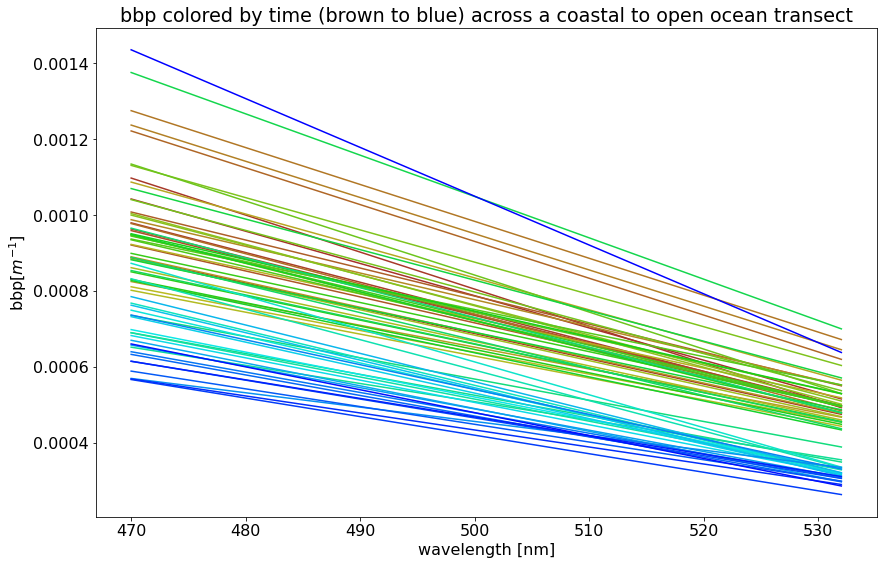

In [99]:
fig, ax = plt.subplots(figsize=(14,9))
for i in range(len(bb3_subset)):
    ax.plot([470,532],bb3_subset.iloc[i,3:5], c=hex_colors[i], alpha=1)
# ax.set_ylim(0,.0009)
# ax.set_xlim(390,752)
ax.set_ylabel('bbp[$m^{-1}$]')
ax.set_xlabel('wavelength [nm]')  
plt.title('bbp colored by time (brown to blue) across a coastal to open ocean transect')
# plt.savefig('bbp_spec.png')
plt.show()

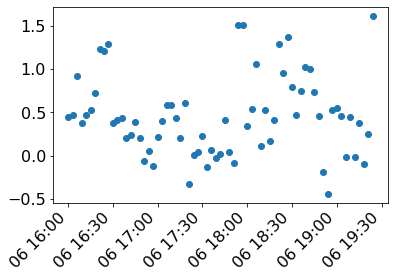

In [100]:
fig, ax = plt.subplots()
ax.scatter(pd.to_datetime(bb3_subset.datetime),bb3_subset['gamma_bbp'])
fig.autofmt_xdate(rotation=45)

# plt.ylim(.3,1)
# plt.savefig('gamma.png')

In [187]:
df_subset.columns[29:33]

Index(['ap_30', 'ap_31', 'ap_32', 'ap_33'], dtype='object')

In [188]:
df_subset.columns[29+81:33+81]

Index(['cp_30', 'cp_31', 'cp_32', 'cp_33'], dtype='object')

In [189]:
df_subset.iloc[10, 29+81:33+81]

cp_30    0.186287
cp_31    0.185449
cp_32     0.18372
cp_33     0.18224
Name: 2021-09-06 16:59:00, dtype: object

In [190]:
acs_wavelength[15:20]

array([462.4, 466.6, 471.3, 475.9, 481. ])

In [236]:
bb_ratio = []
df_subset['bb_ratio'] = None
for i in range(len(df_subset)):
    idx = bb3_subset.index[bb3_subset.index.get_loc(pd.to_datetime(df_subset.iloc[i].datetime), method='nearest')]
    bb_532 = bb3_subset.loc[idx].bbp_2
    b532 = df_subset.iloc[i, 29+81:33+81].mean()
    bb_ratio.append(bb_532/b532)
    df_subset['bb_ratio'].iloc[i] = bb_532/b532
    

<ipython-input-236-2d9458d63c93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['bb_ratio'] = None
/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

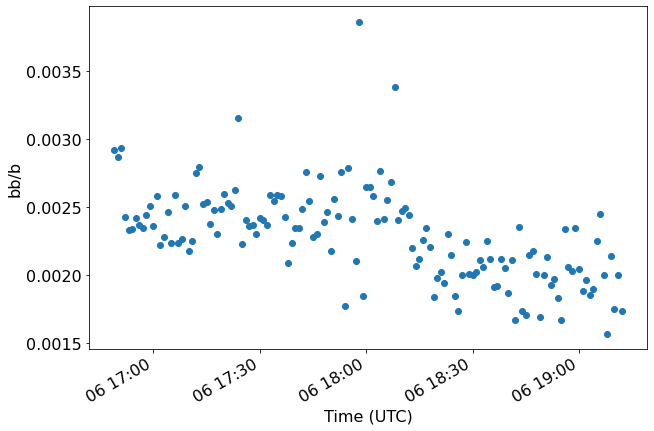

In [228]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(df_subset.datetime,bb_ratio)
# ax.set_ylim(0.000, 0.0080)
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('bb/b')
fig.autofmt_xdate(rotation=30)
# fig.savefig('backscatter_ratio.png')

In [88]:
bb3_subset.loc[idx]

betap_1                  0.000146
betap_2                  0.000072
betap_3                  0.000112
bbp_1                    0.000989
bbp_2                    0.000489
bbp_3                    0.000757
betap_sd_1               0.000026
betap_sd_2               0.000013
betap_sd_3               0.000017
betap_n                        54
gamma_bbp                0.773692
poc_1                   26.169103
poc_2                   15.519151
poc_3                   25.839663
cphyto_1                12.582551
cphyto_2                  7.12655
cphyto_3                12.413778
datetime      2021-09-06 16:49:00
Name: 2021-09-06 16:49:00, dtype: object

In [87]:
df_subset.iloc[0].datetime

Timestamp('2021-09-06 16:49:00')

In [86]:
idx

Timestamp('2021-09-06 16:49:00')

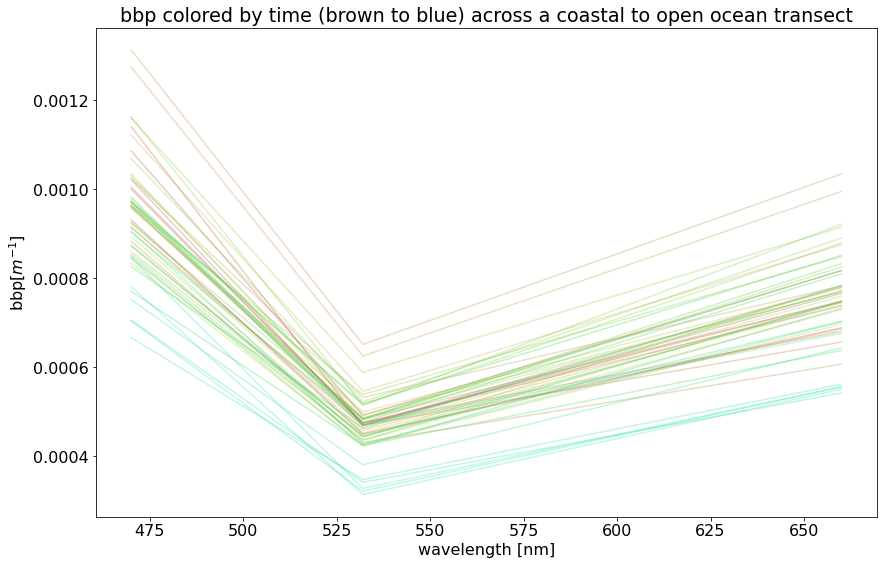

In [117]:
fig, ax = plt.subplots(figsize=(14,9))
for i in range(len(df_subset)):
    ax.plot([470,532,660],bb3_subset.iloc[i,3:6], c=hex_colors[i], alpha=.25)
# ax.set_ylim(0,.0009)
# ax.set_xlim(390,752)
ax.set_ylabel('bbp[$m^{-1}$]')
ax.set_xlabel('wavelength [nm]')  
plt.title('bbp colored by time (brown to blue) across a coastal to open ocean transect')
# plt.savefig('bbp_spec.png')
plt.show()

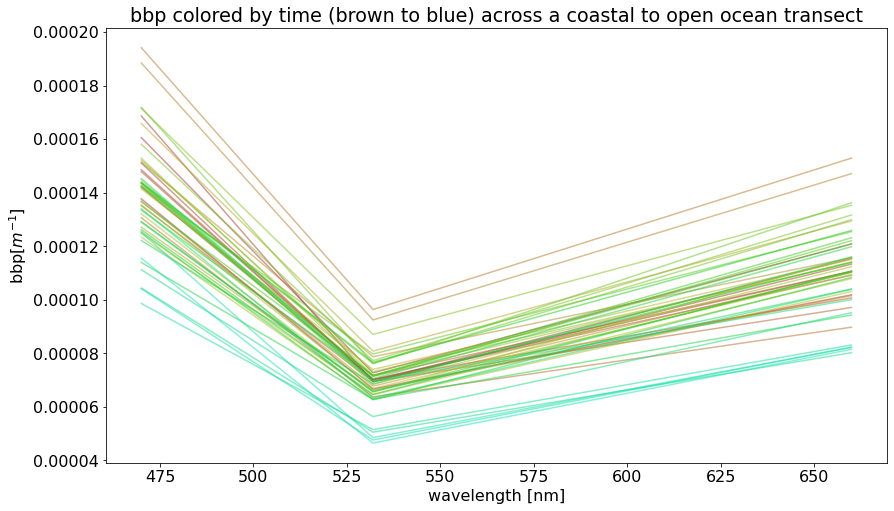

In [118]:
fig, ax = plt.subplots(figsize=(14,8))
for i in range(len(df_subset)):
  #if ~bb3_subset.iloc[i,3:6].isnull().values.any():
  ax.plot([470,532,660],bb3_subset.iloc[i,0:3], c=hex_colors[i], alpha=.5)
# ax.set_ylim(-0.01,.10)
# ax.set_xlim(390,752)
#ax.set_title('Particulate Abs')
ax.set_ylabel('bbp[$m^{-1}$]')
ax.set_xlabel('wavelength [nm]')  
plt.title('bbp colored by time (brown to blue) across a coastal to open ocean transect')
# plt.savefig('bbp_spec.png')
plt.show()